In [496]:
#IMPORT necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [497]:
data = pd.read_csv("train.csv")

In [498]:
data.head()

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,0,0,0,0,0,0
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,0,0,0,0,0,0
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,0,0,0,0,0,0
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. """,0,0,0,0,0,0
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...",0,0,0,0,0,0


# EDA

In [499]:
data.describe()

,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
count,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000
mean,0.095781,0.010262,0.053049,0.003000,0.049179,0.008985
std,0.294292,0.100781,0.224132,0.054693,0.216243,0.094363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [500]:
#checking whether are there any null values
data.isna().sum()

id                 0
text               0
harsh              0
extremely_harsh    0
vulgar             0
threatening        0
disrespect         0
targeted_hate      0
dtype: int64

In [501]:
h0 = data['harsh'].value_counts()[0]
h1 = data['harsh'].value_counts()[1]
print('Total Harsh examples : ', h1)
print('Total Not Harsh examples :', h0)

Total Harsh examples :  12227
Total Not Harsh examples : 115429


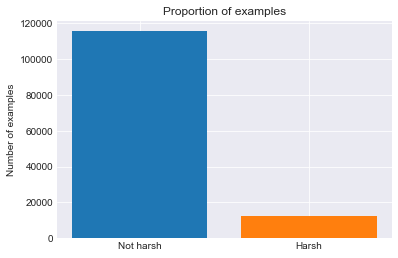

In [502]:
plt.bar(x=0, height=h0, label='Not Harsh')
plt.bar(x=1, height=h1, label='Harsh')
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.xticks(range(2),['Not harsh','Harsh'])
plt.show()

In [503]:
h0 = data['extremely_harsh'].value_counts()[0]
h1 = data['extremely_harsh'].value_counts()[1]
print('Total Extremely harsh examples : ', h1)
print('Total Not Extremely harsh examples :', h0)

Total Extremely harsh examples :  1310
Total Not Extremely harsh examples : 126346


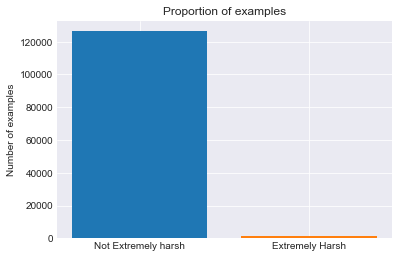

In [504]:
plt.bar(x=0, height=h0, label='Not Extremely Harsh')
plt.bar(x=1, height=h1, label='Extremely Harsh')
plt.ylabel('Number of examples')
plt.xticks(range(2),['Not Extremely harsh','Extremely Harsh'])
plt.title('Proportion of examples')
plt.show()

Total Vulgar examples :  6772
Total Not Vulgar examples : 120884


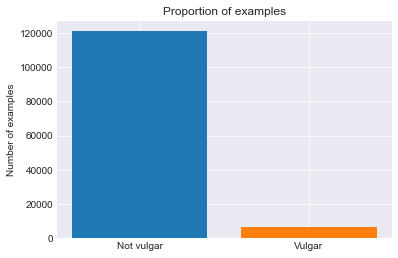

In [433]:
h0 = data['vulgar'].value_counts()[0]
h1 = data['vulgar'].value_counts()[1]
print('Total Vulgar examples : ', h1)
print('Total Not Vulgar examples :', h0)

plt.bar(x=0, height=h0, label='Not Vulgar')
plt.bar(x=1, height=h1, label='Vulgar')
plt.ylabel('Number of examples')
plt.xticks(range(2),['Not vulgar','Vulgar'])
plt.title('Proportion of examples')
plt.show()

Total Threatening examples :  383
Total Not Threatening examples : 127273


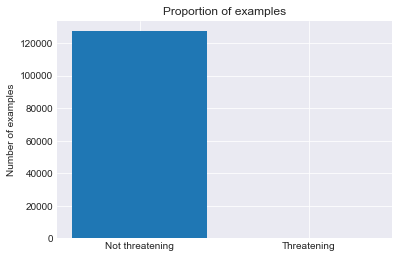

In [434]:
h0 = data['threatening'].value_counts()[0]
h1 = data['threatening'].value_counts()[1]
print('Total Threatening examples : ', h1)
print('Total Not Threatening examples :', h0)

plt.bar(x=0, height=h0, label='Not Threatening')
plt.bar(x=1, height=h1, label='Threatening')
plt.ylabel('Number of examples')
plt.xticks(range(2),['Not threatening','Threatening'])
plt.title('Proportion of examples')
plt.show()

Total disrespect examples :  6278
Total Not disrespect examples : 121378


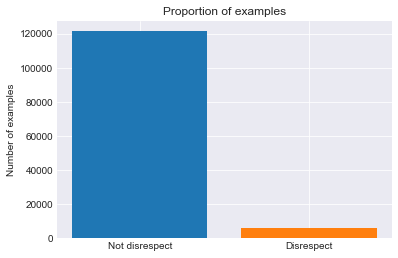

In [505]:
h0 = data['disrespect'].value_counts()[0]
h1 = data['disrespect'].value_counts()[1]
print('Total disrespect examples : ', h1)
print('Total Not disrespect examples :', h0)

plt.bar(x=0, height=h0, label='Not disrespect')
plt.bar(x=1, height=h1, label='disrespect')
plt.ylabel('Number of examples')
plt.xticks(range(2),['Not disrespect','Disrespect'])
plt.title('Proportion of examples')
plt.show()

Total Targeted hate examples :  1147
Total Not targeted hate examples : 126509


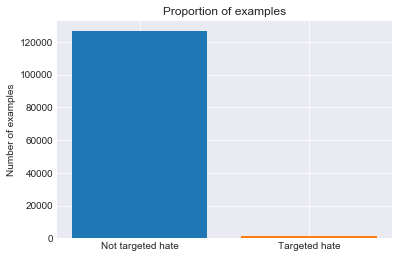

In [436]:

h0 = data['targeted_hate'].value_counts()[0]
h1 = data['targeted_hate'].value_counts()[1]
print('Total Targeted hate examples : ', h1)
print('Total Not targeted hate examples :', h0)

plt.bar(x=0, height=h0, label='Not Targeted hate')
plt.bar(x=1, height=h1, label='Targeted hate')
plt.ylabel('Number of examples')
plt.xticks(range(2),['Not targeted hate','Targeted hate'])
plt.title('Proportion of examples')
plt.show()

In [506]:
data['length'] = data['text'].apply(len)
data.head()

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,length
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,0,0,0,0,0,0,115
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,0,0,0,0,0,0,315
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,0,0,0,0,0,0,310
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. """,0,0,0,0,0,0,44
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...",0,0,0,0,0,0,441


In [507]:
#Returns the proportion of uppercase in the text
def string_test(s):
    d={"UPPER_CASE":1, "LOWER_CASE":1}
    for c in s:
        if c.isupper():
            d["UPPER_CASE"]+=1
        elif c.islower():
            d["LOWER_CASE"]+=1
        else:
            pass
    return d['UPPER_CASE']/len(s)

In [508]:
data['Case_prop'] = data['text'].apply(string_test)
data.head()

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,length,Case_prop
0,52e0f91a5d7b74552c55,New Main Picture \n\nHow about this for the ma...,0,0,0,0,0,0,115,0.052174
1,e2c8e370a8e53ba26bae,Think of them like population charts. Just bec...,0,0,0,0,0,0,315,0.012698
2,03c807f61149a13c8404,This page seems a little misleading. The reaso...,0,0,0,0,0,0,310,0.016129
3,fc63a1ba3372899db19f,"""\n\nActually, accounts are never deleted. """,0,0,0,0,0,0,44,0.045455
4,0c2bfd9cde8974d9915f,"""\n\nYeah yeah, OK. So did I. Still, what I ...",0,0,0,0,0,0,441,0.034014


In [515]:
d0 = data[data['harsh'] == 0]
d1 = data[data['harsh'] == 1]
new_data = pd.concat([d0.sample(n=12227), d1.sample(n=12227)])
new_data = new_data.sample(frac=1).reset_index()

In [516]:
h0 = new_data['harsh'].value_counts()[0]
h1 = new_data['harsh'].value_counts()[1]
print('Total Harsh examples : ', h0)
print('Total Not Harsh examples :', h1)

Total Harsh examples :  12227
Total Not Harsh examples : 12227


In [517]:
new_data.groupby('harsh').median()

,index,extremely_harsh,vulgar,threatening,disrespect,targeted_hate,length,Case_prop
harsh,,,,,,,,
0,64429.0,0.0,0.0,0.0,0.0,0.0,216.0,0.037410
1,63814.0,0.0,1.0,0.0,0.0,0.0,123.0,0.045455


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'Length'),
 Text(0.5, 1.0, 'Not harsh')]

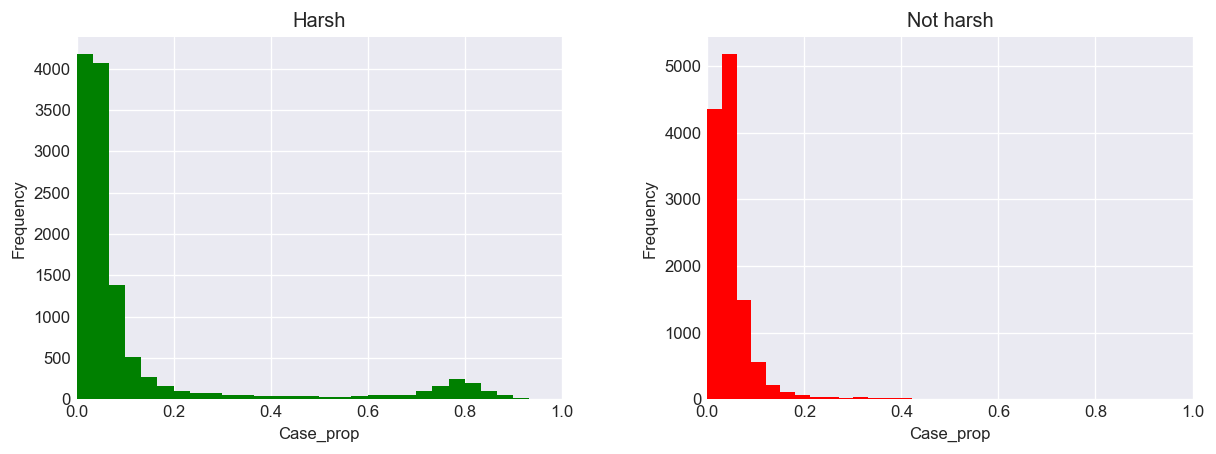

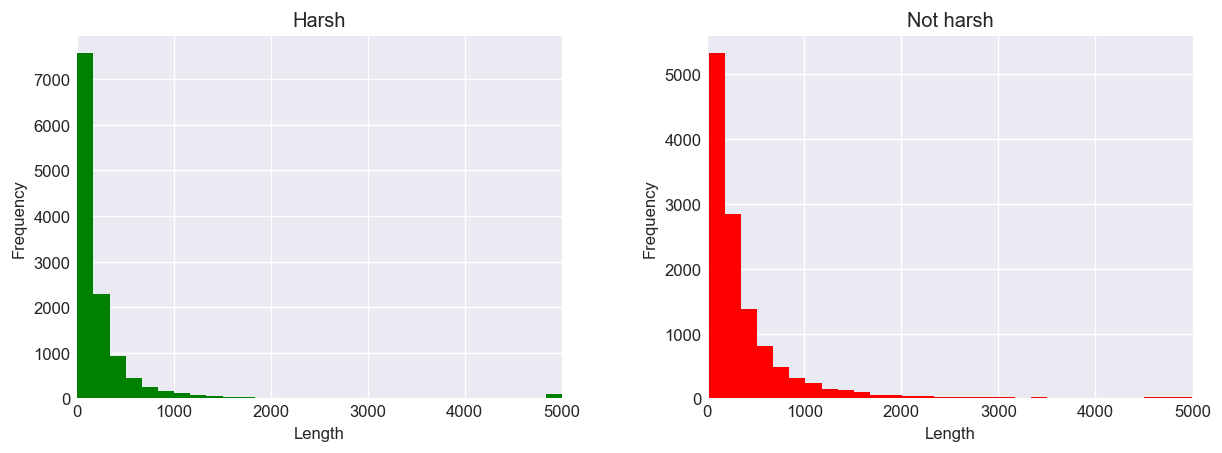

In [518]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data[new_data['harsh'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Harsh',xlim=(0,1))
new_data[new_data['harsh']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not harsh',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data[new_data['harsh'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Harsh',xlim=(0,5000))
new_data[new_data['harsh']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Not harsh',xlim=(0,5000))

In [543]:
d0 = data[data['extremely_harsh'] == 0]
d1 = data[data['extremely_harsh'] == 1]
new_data2 = pd.concat([d0.sample(n=1310), d1.sample(n=1310)])
new_data2 = new_data2.sample(frac=1).reset_index()
print(new_data2.shape)

(2620, 11)


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'Length'),
 Text(0.5, 1.0, 'Not extremely harsh')]

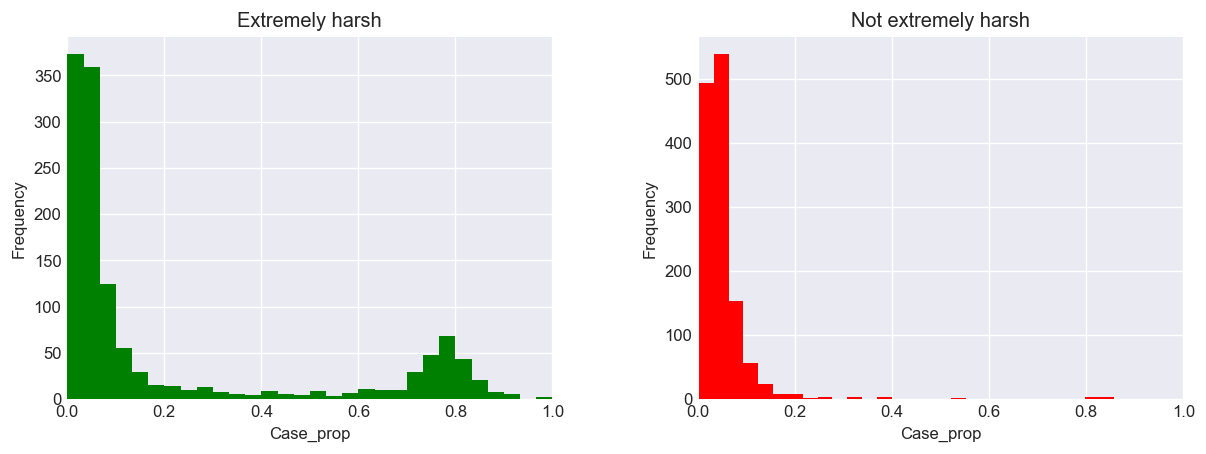

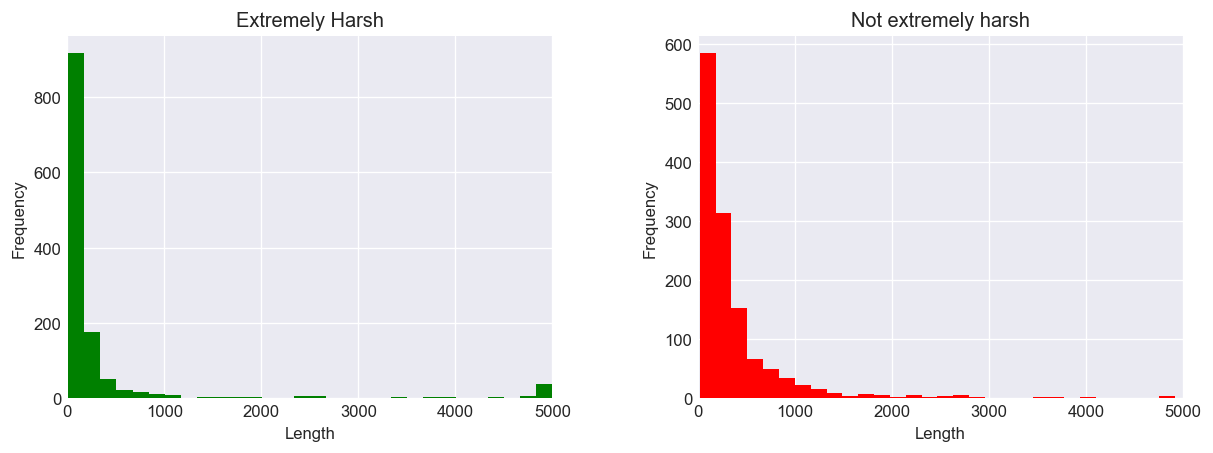

In [522]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data2[new_data2['extremely_harsh'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Extremely harsh',xlim=(0,1))
new_data2[new_data2['extremely_harsh']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not extremely harsh',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data2[new_data2['extremely_harsh'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Extremely Harsh',xlim=(0,5000))
new_data2[new_data2['extremely_harsh']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Not extremely harsh',xlim=(0,5000))

(13544, 11)


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'Not vulgar')]

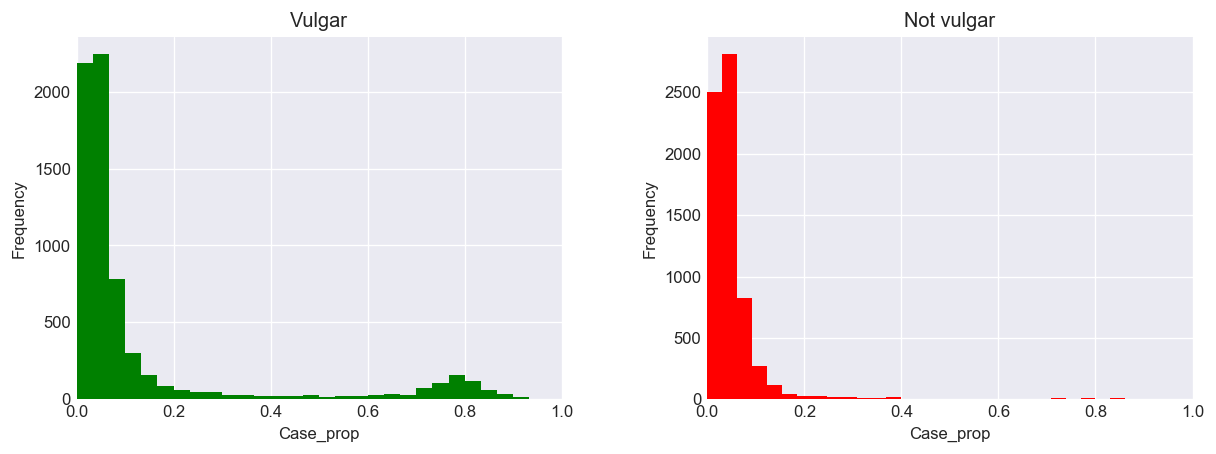

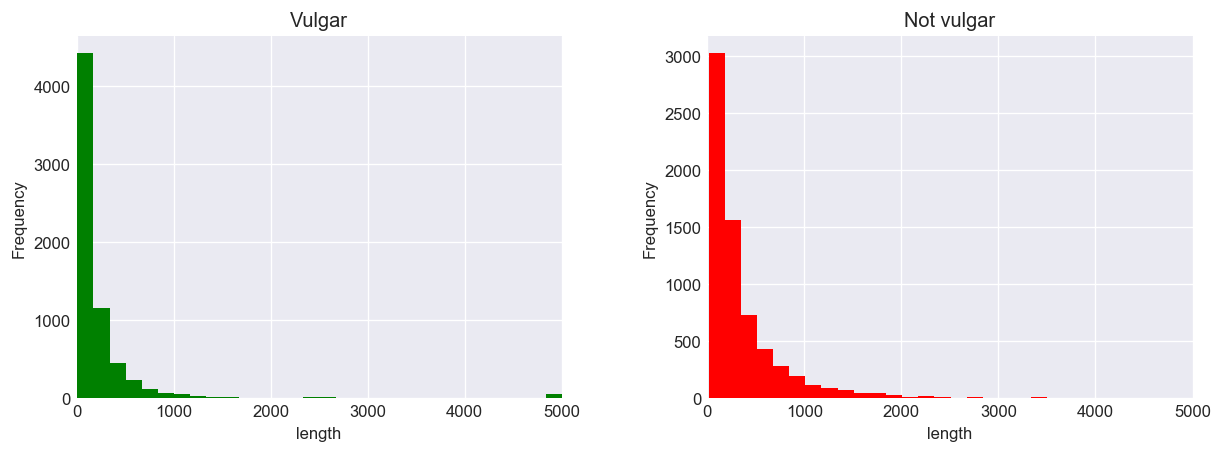

In [523]:
d0 = data[data['vulgar'] == 0]
d1 = data[data['vulgar'] == 1]
new_data3 = pd.concat([d0.sample(n=6772), d1.sample(n=6772)])
new_data3 = new_data3.sample(frac=1).reset_index()
print(new_data3.shape)

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data3[new_data3['vulgar'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Vulgar',xlim=(0,1))
new_data3[new_data3['vulgar']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not vulgar',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data3[new_data3['vulgar'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'length',ylabel = 'Frequency',title = 'Vulgar',xlim=(0,5000))
new_data3[new_data3['vulgar']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'length',ylabel = 'Frequency',title = 'Not vulgar',xlim=(0,5000))

(766, 11)


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'Not threatening')]

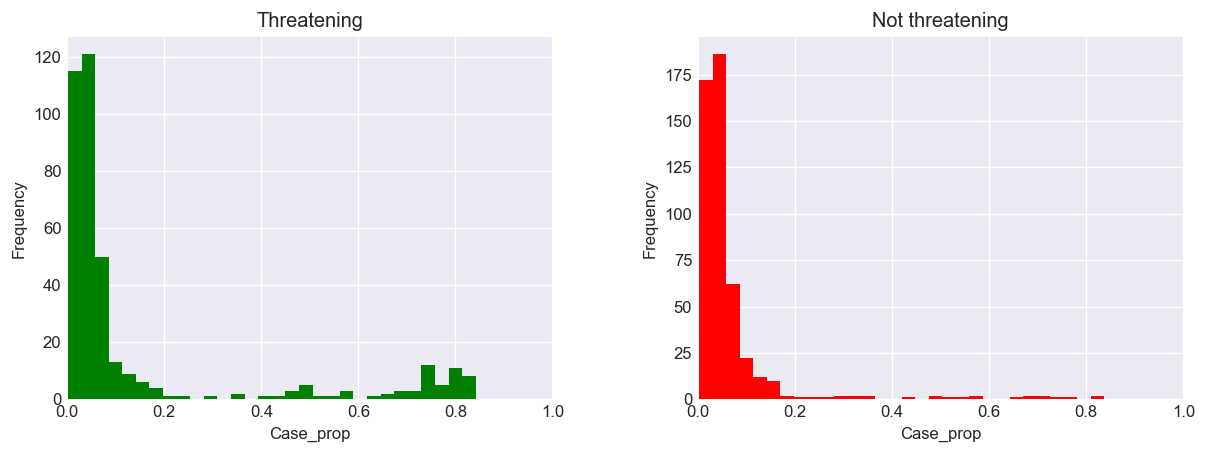

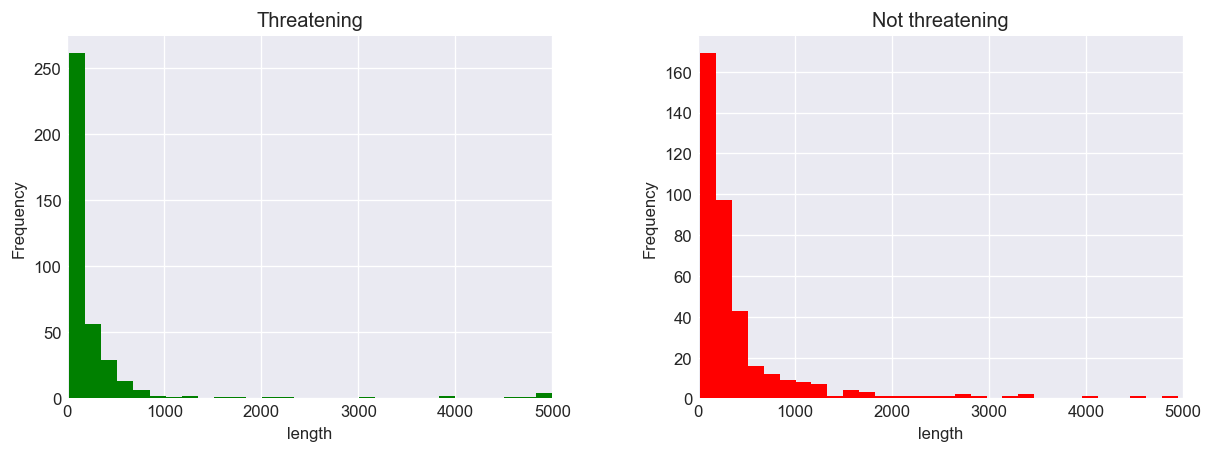

In [524]:
d0 = data[data['threatening'] == 0]
d1 = data[data['threatening'] == 1]
new_data4 = pd.concat([d0.sample(n=383), d1.sample(n=383)])
new_data4 = new_data4.sample(frac=1).reset_index()
print(new_data4.shape)

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data4[new_data4['threatening'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Threatening',xlim=(0,1))
new_data4[new_data4['vulgar']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not threatening',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data4[new_data4['threatening'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'length',ylabel = 'Frequency',title = 'Threatening',xlim=(0,5000))
new_data4[new_data4['threatening']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'length',ylabel = 'Frequency',title = 'Not threatening',xlim=(0,5000))

(12556, 11)


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'Not disrespect')]

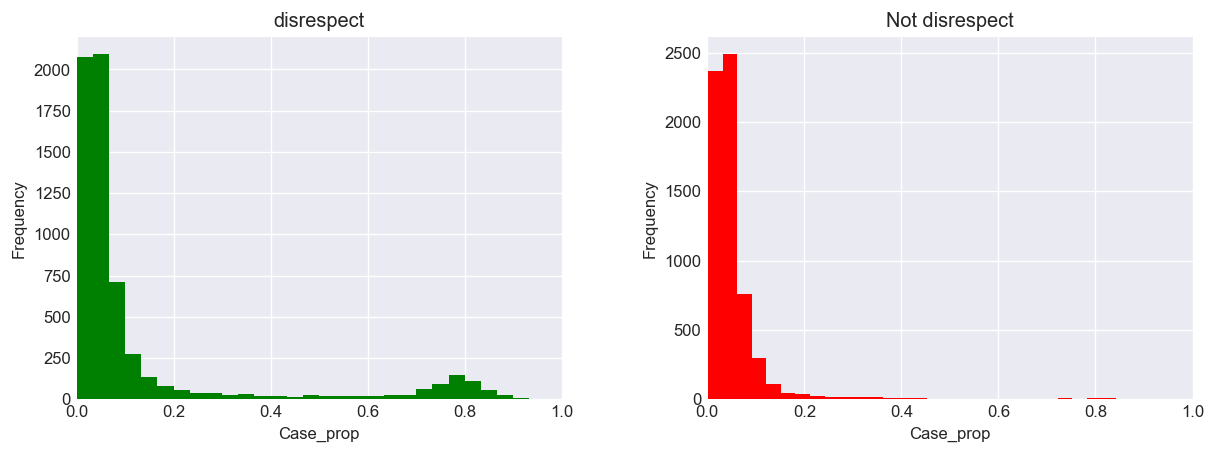

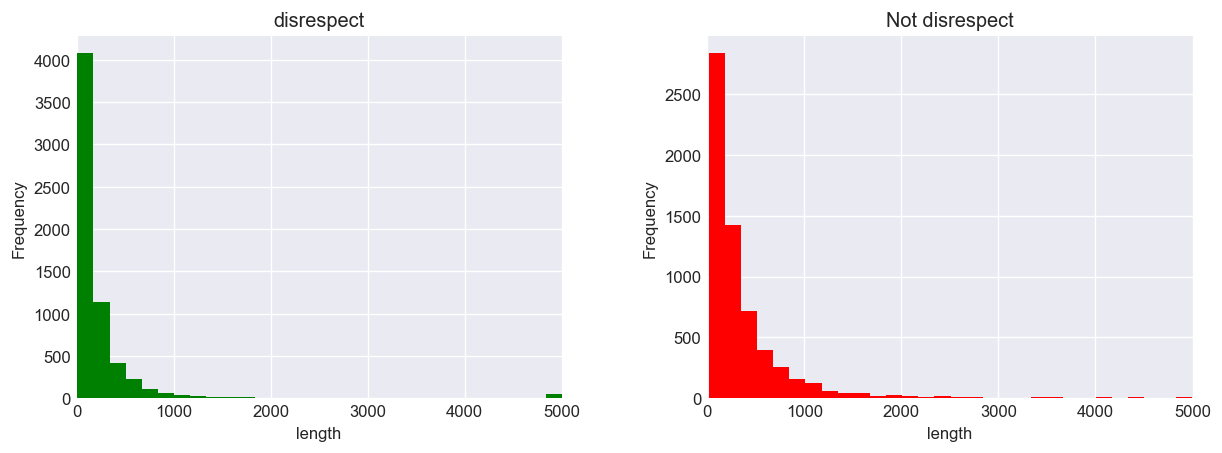

In [525]:
d0 = data[data['disrespect'] == 0]
d1 = data[data['disrespect'] == 1]
new_data5 = pd.concat([d0.sample(n=6278), d1.sample(n=6278)])
new_data5 = new_data5.sample(frac=1).reset_index()
print(new_data5.shape)

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data5[new_data5['disrespect'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'disrespect',xlim=(0,1))
new_data5[new_data5['disrespect']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not disrespect',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data5[new_data5['disrespect'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'length',ylabel = 'Frequency',title = 'disrespect',xlim=(0,5000))
new_data5[new_data5['disrespect']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'length',ylabel = 'Frequency',title = 'Not disrespect',xlim=(0,5000))

(2294, 11)


[Text(0, 0.5, 'Frequency'),
 (0, 5000),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'Not targeted_hate')]

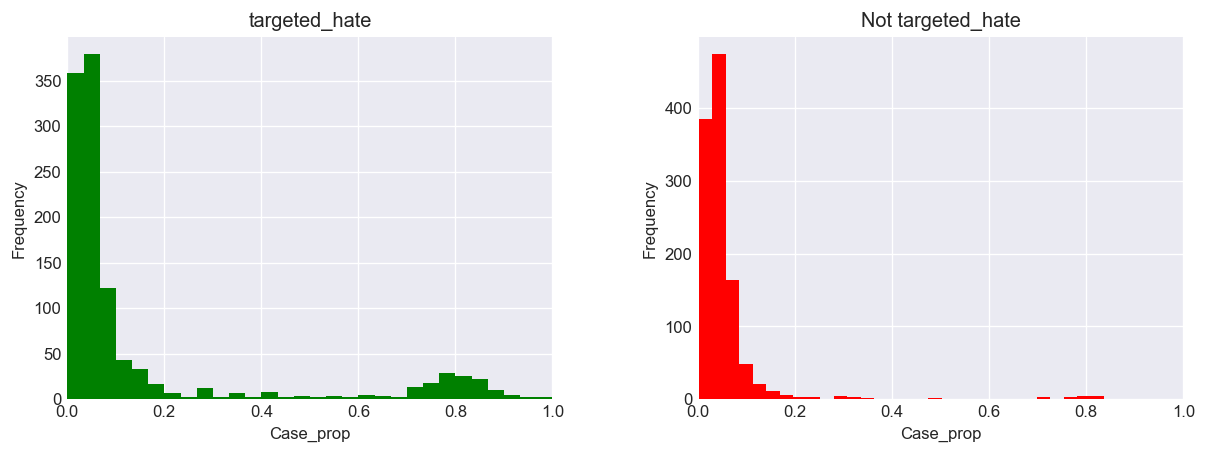

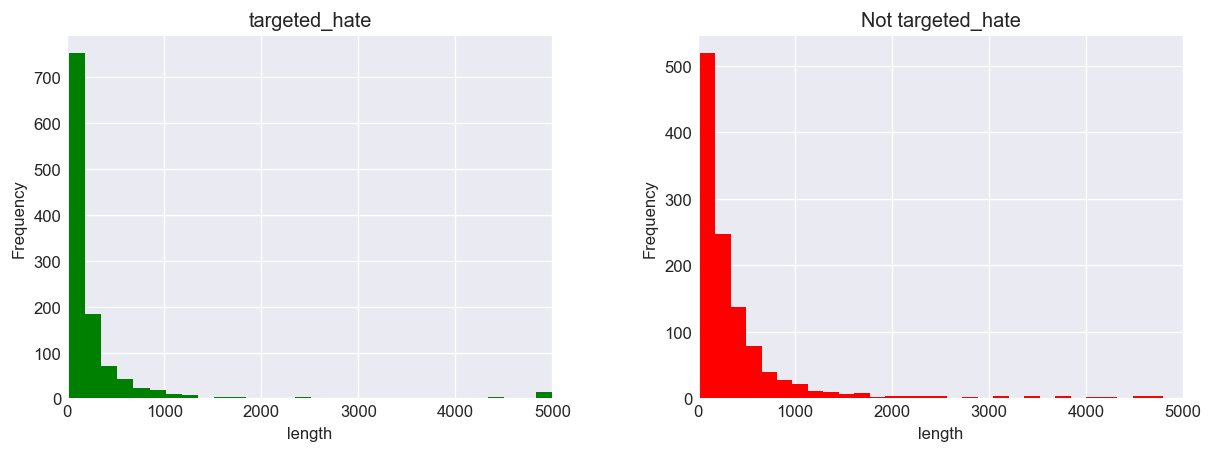

In [527]:
d0 = data[data['targeted_hate'] == 0]
d1 = data[data['targeted_hate'] == 1]
new_data6 = pd.concat([d0.sample(n=1147), d1.sample(n=1147)])
new_data6 = new_data6.sample(frac=1).reset_index()
print(new_data6.shape)

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data6[new_data6['targeted_hate'] == 1].hist(column='Case_prop', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'targeted_hate',xlim=(0,1))
new_data6[new_data6['targeted_hate']== 0].hist(column='Case_prop', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Case_prop',ylabel = 'Frequency',title = 'Not targeted_hate',xlim=(0,1))

fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

new_data6[new_data6['targeted_hate'] == 1].hist(column='length', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'length',ylabel = 'Frequency',title = 'targeted_hate',xlim=(0,5000))
new_data6[new_data6['targeted_hate']== 0].hist(column='length', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'length',ylabel = 'Frequency',title = 'Not targeted_hate',xlim=(0,5000))

In [528]:
print(new_data.groupby('harsh').median()[['length','Case_prop']])
print(new_data2.groupby('extremely_harsh').median()[['length','Case_prop']])
print(new_data3.groupby('vulgar').median()[['length','Case_prop']])
print(new_data4.groupby('threatening').median()[['length','Case_prop']])
print(new_data5.groupby('disrespect').median()[['length','Case_prop']])
print(new_data6.groupby('targeted_hate').median()[['length','Case_prop']])

       length  Case_prop
harsh                   
0       216.0   0.037410
1       123.0   0.045455
                 length  Case_prop
extremely_harsh                   
0                 214.0   0.038462
1                  95.0   0.057143
        length  Case_prop
vulgar                   
0        209.0   0.037037
1        110.0   0.047145
             length  Case_prop
threatening                   
0             211.0   0.036827
1             121.0   0.044944
            length  Case_prop
disrespect                   
0            210.0   0.037612
1            113.0   0.046470
               length  Case_prop
targeted_hate                   
0               199.0   0.037594
1               115.0   0.047619


# Preprocessing

In [529]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
wordnet_lemmatizer = WordNetLemmatizer()

In [530]:
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Lemmatize the words
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Remove any stopwords
    nostop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #Lemmatize
    
    return [wordnet_lemmatizer.lemmatize(word.lower()) for word in nostop ]

In [531]:
# Check to make sure its working
new_data['text'].head(5).apply(text_process)


0    [que, oh, lighten, seriously, randstad, howeve...
1    [stop, wanking, much, remember, lotion, preven...
2    [12, december, 2010, utc, would, like, act, ci...
3    [vaguely, recall, discussion, proposed, dont, ...
4    [2012, fascism, name, raymond, mardyks, valuab...
Name: text, dtype: object

In [532]:
from sklearn.feature_extraction.text import CountVectorizer

In [533]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(new_data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

61272


In [534]:
text2 = new_data['text'][1]
print(text2)

Stop wanking so much. Remember, only lotion prevents friction burn.


In [535]:
bow2 = bow_transformer.transform([text2])
print(bow2)
print(bow2.shape)

  (0, 10450)	1
  (0, 22146)	1
  (0, 32651)	1
  (0, 35774)	1
  (0, 41840)	1
  (0, 44266)	1
  (0, 50134)	1
  (0, 56967)	1
(1, 61272)


In [536]:
print(bow_transformer.get_feature_names()[777])
print(bow_transformer.get_feature_names()[1487])

148247186142
1way


In [537]:
text_bow = bow_transformer.transform(new_data['text'])

In [538]:
print('Shape of Sparse Matrix: ',text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (24454, 61272)
Amount of Non-Zero occurences:  577915


In [539]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf2 = tfidf_transformer.transform(bow2)
print(tfidf2)

  (0, 56967)	0.41916131029170806
  (0, 50134)	0.18174166939882047
  (0, 44266)	0.2610039969902403
  (0, 41840)	0.40879769754183976
  (0, 35774)	0.1962355194317129
  (0, 32651)	0.46471465248819804
  (0, 22146)	0.4513536318518827
  (0, 10450)	0.3128049380820765


In [540]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(24454, 61272)


In [546]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data['text'], new_data['harsh'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

19563 4891 24454


In [547]:
#Use the classifier of choice

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


mnb = MultinomialNB()
logreg = LogisticRegression()

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])

In [548]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [549]:
predictions = pipeline.predict(X_test)

In [550]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2600
           1       0.86      0.91      0.88      2291

    accuracy                           0.89      4891
   macro avg       0.89      0.89      0.89      4891
weighted avg       0.89      0.89      0.89      4891



In [551]:
predictions_proba = pipeline.predict_proba(X_test)

In [552]:
print(X_test.head())

12853    "\n\nIntel editing WP\n\nFound this, hilarious...
2810     Hey, guess what?  You're still a twat.  I love...
19206                              User:Abd is muslim cr@p
2899     Audi A4\nYOU ARE ASSHOLE, MOTHERFUCKER, SHIT, ...
1302     "\nExcellent. So you understand it does not me...
Name: text, dtype: object


In [553]:
#probability of harsh
predictions_proba[:,1]

array([0.17840796, 0.96814623, 0.51334176, ..., 0.23957238, 0.27115248,
       0.70665651])

In [554]:
test = pd.read_csv('test.csv')
test.head()

,id,text
0,25f48f649f60423c091b,", 19 May 2006 (UTC)\nThey debate, they don't v..."
1,5c7ac6d7fb400bbadfc7,"""\n\nI am completely nonplussed at this """"We'v..."
2,d00a363d57952496854f,"""\n\nUnblock request\n\nCategory:User block te..."
3,b082c69afa60b378503d,"Dave 1185 \n\nIf you have a moment, can you he..."
4,1a585118ed7e1f29b38b,WarningPlease stop adding nonsense to Wikipedi...


In [555]:
test_text = test['text']

In [556]:
predictions_proba = pipeline.predict_proba(test_text)

In [557]:
print(test_text.head())

0    , 19 May 2006 (UTC)\nThey debate, they don't v...
1    "\n\nI am completely nonplussed at this ""We'v...
2    "\n\nUnblock request\n\nCategory:User block te...
3    Dave 1185 \n\nIf you have a moment, can you he...
4    WarningPlease stop adding nonsense to Wikipedi...
Name: text, dtype: object


In [558]:
#probability of harsh
predictions_proba[:5,1]

array([0.10768948, 0.0669671 , 0.12336973, 0.05075332, 0.36621232])

In [559]:
res = pd.DataFrame({'id':list(test['id']),'harsh':list(predictions_proba[:,1])})
res.head()

,id,harsh
0,25f48f649f60423c091b,0.107689
1,5c7ac6d7fb400bbadfc7,0.066967
2,d00a363d57952496854f,0.123370
3,b082c69afa60b378503d,0.050753
4,1a585118ed7e1f29b38b,0.366212


In [560]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data2['text'], new_data2['extremely_harsh'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

2096 524 2620


In [561]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [562]:
predictions = pipeline.predict(X_test)

In [563]:
print(X_test.head())

1049        FUCK YOU KID, Get the Fuck out of my country.
156                    fok you \n\nYOU SUK BITSH FOCK YOU
787     Fuck off you Paki bastard. Take your sad pathe...
294     Issues with the current version \n\n1. Eritrea...
2179    I am not using wikipedia articles as reference...
Name: text, dtype: object


In [564]:
#predictions of  extremely harsh
predictions[:5]

array([1, 0, 1, 0, 0])

In [565]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       276
           1       0.90      0.96      0.93       248

    accuracy                           0.93       524
   macro avg       0.93      0.93      0.93       524
weighted avg       0.93      0.93      0.93       524



In [566]:
predictions_proba = pipeline.predict_proba(test_text)

In [567]:
res['extremely_harsh'] = predictions_proba[:,1]

In [568]:
res.head()

,id,harsh,extremely_harsh
0,25f48f649f60423c091b,0.107689,0.200450
1,5c7ac6d7fb400bbadfc7,0.066967,0.155126
2,d00a363d57952496854f,0.123370,0.307660
3,b082c69afa60b378503d,0.050753,0.048206
4,1a585118ed7e1f29b38b,0.366212,0.136302


In [569]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data3['text'], new_data3['vulgar'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

10835 2709 13544


In [570]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [571]:
predictions = pipeline.predict(X_test)

In [572]:
print(X_test.head())

1224     p.s. I'M A FUCKIN ARTIST OK? MY NEXT PIECE WIL...
11047    , 20 August 2006 (UTC)\nNot all Gedolim oppose...
3941     idiocy \n\nYou are a fucking moron. STOP REMOV...
7859     You're such one god damn nigger for a titty pe...
9377     }}\n{{citation|author-surname=Youngs|author-fi...
Name: text, dtype: object


In [573]:
#predictions of  vulgar
predictions[:5]

array([1, 0, 1, 1, 0])

In [574]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1500
           1       0.88      0.95      0.91      1209

    accuracy                           0.92      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.92      0.92      0.92      2709



In [575]:
predictions_proba = pipeline.predict_proba(test_text)

In [576]:
res['vulgar'] = predictions_proba[:,1]

In [577]:
res.head()

,id,harsh,extremely_harsh,vulgar
0,25f48f649f60423c091b,0.107689,0.200450,0.160989
1,5c7ac6d7fb400bbadfc7,0.066967,0.155126,0.078852
2,d00a363d57952496854f,0.123370,0.307660,0.241085
3,b082c69afa60b378503d,0.050753,0.048206,0.034524
4,1a585118ed7e1f29b38b,0.366212,0.136302,0.223227


(-0.5, 1599.5, 799.5, -0.5)

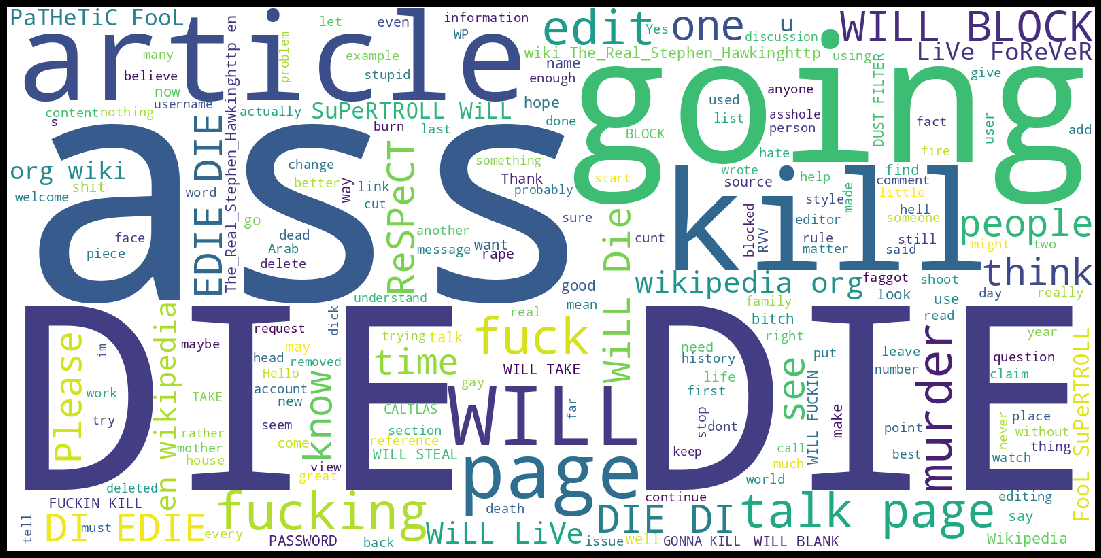

In [578]:
#Threatening

from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(new_data4['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [579]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data4['text'], new_data4['threatening'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

612 154 766


In [580]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [581]:
predictions = pipeline.predict(X_test)

In [582]:
print(X_test.head())

211              you're a cunt\ngo die in a fire kthx <3
460    i will ki \n\nll you and wear your skin like a...
128    I am coming to get you \n\ni know where you li...
528    Tickle my ass with a feather! \n\nYes, yes, ye...
225      Whoever put a notices on my page. I will kill u
Name: text, dtype: object


In [583]:
#predictions of  threatening
predictions[:5]

array([1, 0, 1, 1, 1])

In [584]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        83
           1       0.86      0.93      0.89        71

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



In [585]:
predictions_proba = pipeline.predict_proba(test_text)

In [586]:
res['threatening'] = predictions_proba[:,1]

In [587]:
res.head()

,id,harsh,extremely_harsh,vulgar,threatening
0,25f48f649f60423c091b,0.107689,0.200450,0.160989,0.347187
1,5c7ac6d7fb400bbadfc7,0.066967,0.155126,0.078852,0.274065
2,d00a363d57952496854f,0.123370,0.307660,0.241085,0.442989
3,b082c69afa60b378503d,0.050753,0.048206,0.034524,0.195853
4,1a585118ed7e1f29b38b,0.366212,0.136302,0.223227,0.267857


(-0.5, 1599.5, 799.5, -0.5)

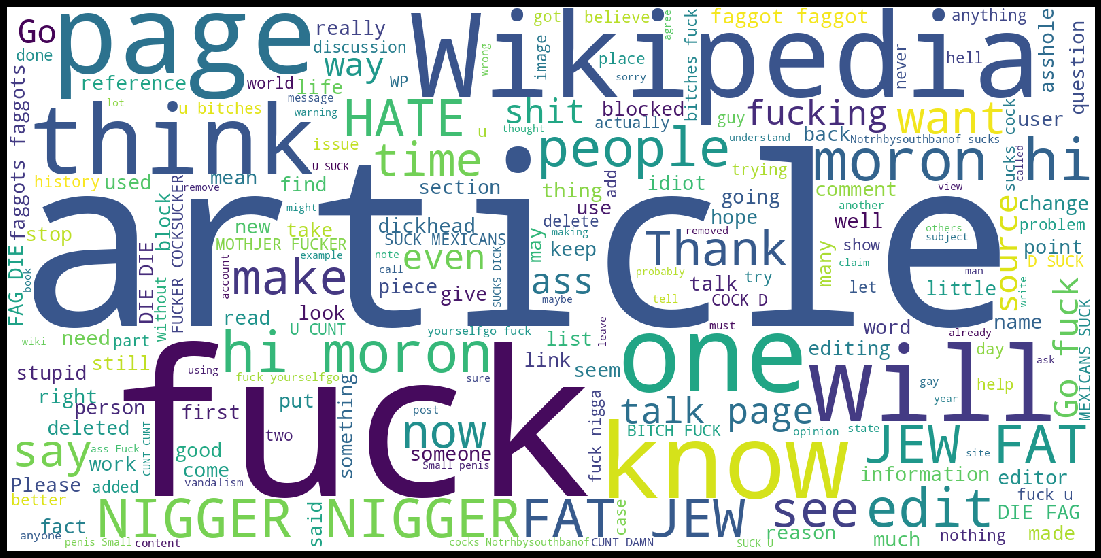

In [588]:
#Disrespect

from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(new_data5['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [589]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data5['text'], new_data5['disrespect'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

10044 2512 12556


In [590]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [591]:
predictions = pipeline.predict(X_test)

In [592]:
print(X_test.head())

12187    ".\n \nI'm not sure I get your point.  Readers...
6353     Hey you fag!! \n\nleave the english Wikipedia ...
8289     Quit with the crap, okay?  \n\nToo many people...
11213    Meanwhile, I'll wait and see if 'LonewolfBC' a...
5544     Curly bracket gone, but just one image, I thou...
Name: text, dtype: object


In [593]:
#predictions of  disrespect
predictions[:5]

array([0, 1, 0, 0, 0])

In [594]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1345
           1       0.88      0.93      0.90      1167

    accuracy                           0.91      2512
   macro avg       0.91      0.91      0.91      2512
weighted avg       0.91      0.91      0.91      2512



In [595]:
predictions_proba = pipeline.predict_proba(test_text)

In [596]:
res['disrespect'] = predictions_proba[:,1]

In [597]:
res.head()

,id,harsh,extremely_harsh,vulgar,threatening,disrespect
0,25f48f649f60423c091b,0.107689,0.200450,0.160989,0.347187,0.143461
1,5c7ac6d7fb400bbadfc7,0.066967,0.155126,0.078852,0.274065,0.097753
2,d00a363d57952496854f,0.123370,0.307660,0.241085,0.442989,0.190265
3,b082c69afa60b378503d,0.050753,0.048206,0.034524,0.195853,0.030357
4,1a585118ed7e1f29b38b,0.366212,0.136302,0.223227,0.267857,0.259529


(-0.5, 1599.5, 799.5, -0.5)

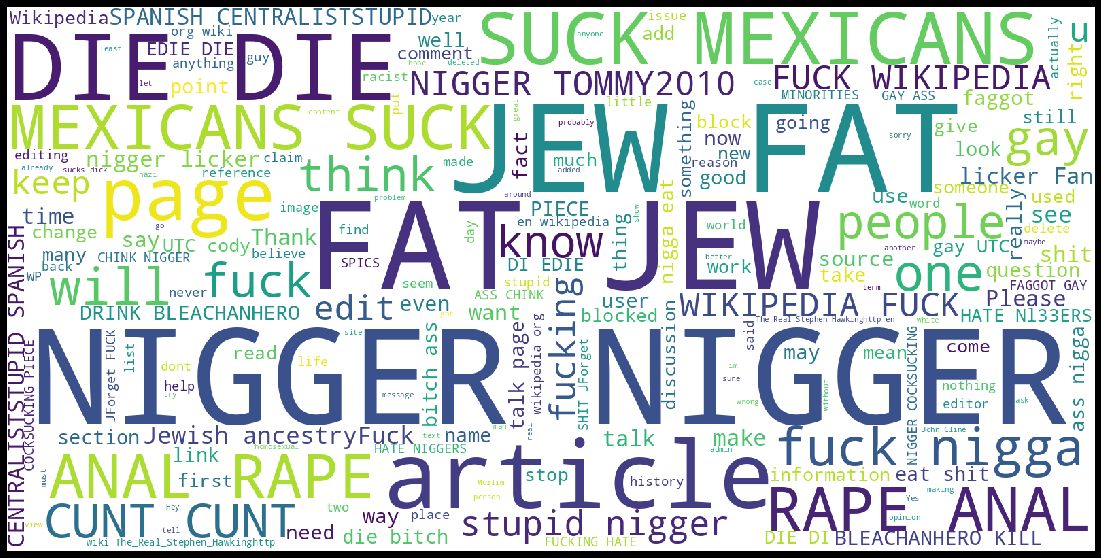

In [598]:
#Targeted hate

from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white",width=1600,height=800).generate(''.join(new_data6['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [599]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data6['text'], new_data6['targeted_hate'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

1835 459 2294


In [600]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fab365661f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [601]:
predictions = pipeline.predict(X_test)

In [602]:
print(X_test.head())

1920    "\n\nSo, the British sided with the Americans,...
1356    What the fuck does a dumb Canadian polock like...
1112    My father and others used to sing it here in A...
980     I swear to GOD u republican TOOLBAG\nIf I ever...
333     "\n\n Very dubious text \n\nAccording many shc...
Name: text, dtype: object


In [603]:
#probability of  targeted_hate
predictions[:5]

array([0, 1, 0, 1, 0])

In [604]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       227
           1       0.88      0.94      0.91       232

    accuracy                           0.90       459
   macro avg       0.91      0.90      0.90       459
weighted avg       0.91      0.90      0.90       459



In [605]:
predictions_proba = pipeline.predict_proba(test_text)

In [606]:
res['targeted_hate'] = predictions_proba[:,1]

In [607]:
res.head()

,id,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,25f48f649f60423c091b,0.107689,0.200450,0.160989,0.347187,0.143461,0.243599
1,5c7ac6d7fb400bbadfc7,0.066967,0.155126,0.078852,0.274065,0.097753,0.194753
2,d00a363d57952496854f,0.123370,0.307660,0.241085,0.442989,0.190265,0.319123
3,b082c69afa60b378503d,0.050753,0.048206,0.034524,0.195853,0.030357,0.078964
4,1a585118ed7e1f29b38b,0.366212,0.136302,0.223227,0.267857,0.259529,0.198734


In [608]:
res.to_csv('results_logreg.csv',index=False)

In [609]:
test_text.shape

(31915,)

In [610]:
res.shape

(31915, 7)